In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/creditcard.csv.zip', compression='zip')

In [3]:
df['Idx'] = range(1, len(df) + 1)

In [5]:
df = df.set_index('Idx')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Idx,,,,,,,,,,,,,,,,,,,,,
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df[df.index.isin({1, })]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Idx,,,,,,,,,,,,,,,,,,,,,
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [12]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

In [13]:
fraud_ids = fraud.index.values

In [38]:
non_fraud_trimmed_ids = np.random.choice(non_fraud.index.values, len(fraud_ids))
print(f'fraud_ids size is {len(fraud_ids)} non_fraud_trimmed_ids size is {len(non_fraud_trimmed_ids)}')

fraud_ids size is 492 non_fraud_trimmed_ids size is 492


In [39]:
dataset = df[(df.index.isin(fraud_ids)) | (df.index.isin(non_fraud_trimmed_ids))]

In [40]:
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 331 to 284301
Data columns (total 31 columns):
Time      984 non-null float64
V1        984 non-null float64
V2        984 non-null float64
V3        984 non-null float64
V4        984 non-null float64
V5        984 non-null float64
V6        984 non-null float64
V7        984 non-null float64
V8        984 non-null float64
V9        984 non-null float64
V10       984 non-null float64
V11       984 non-null float64
V12       984 non-null float64
V13       984 non-null float64
V14       984 non-null float64
V15       984 non-null float64
V16       984 non-null float64
V17       984 non-null float64
V18       984 non-null float64
V19       984 non-null float64
V20       984 non-null float64
V21       984 non-null float64
V22       984 non-null float64
V23       984 non-null float64
V24       984 non-null float64
V25       984 non-null float64
V26       984 non-null float64
V27       984 non-null float64
V28       984 non-null

In [42]:
dataset[dataset['Class'] == 1].mean()

Time      80746.806911
V1           -4.771948
V2            3.623778
V3           -7.033281
V4            4.542029
V5           -3.151225
V6           -1.397737
V7           -5.568731
V8            0.570636
V9           -2.581123
V10          -5.676883
V11           3.800173
V12          -6.259393
V13          -0.109334
V14          -6.971723
V15          -0.092929
V16          -4.139946
V17          -6.665836
V18          -2.246308
V19           0.680659
V20           0.372319
V21           0.713588
V22           0.014049
V23          -0.040308
V24          -0.105130
V25           0.041449
V26           0.051648
V27           0.170575
V28           0.075667
Amount      122.211321
Class         1.000000
dtype: float64

In [43]:
dataset[dataset['Class'] == 0].mean()

Time      96366.227642
V1            0.043681
V2            0.068811
V3           -0.006703
V4           -0.122699
V5           -0.025988
V6           -0.003602
V7            0.065622
V8            0.033191
V9           -0.010866
V10           0.044712
V11          -0.062613
V12          -0.002467
V13          -0.062352
V14           0.009401
V15          -0.065747
V16          -0.024593
V17          -0.005128
V18          -0.003968
V19           0.000946
V20          -0.014066
V21           0.005588
V22          -0.012074
V23          -0.006449
V24           0.059885
V25           0.020542
V26          -0.017212
V27          -0.035569
V28          -0.001786
Amount       84.622398
Class         0.000000
dtype: float64

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
%config InlineBackend.figure_format = 'png' 


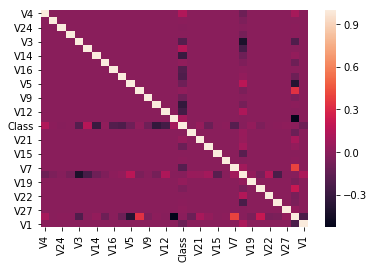

In [50]:
corr_matrix = df[list(set(dataset.columns) - set('Class'))].corr()
sns.heatmap(corr_matrix)


In [51]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [77]:
def get_accuracy_knn(X, y, with_scaling: bool=False, n_neighbour: int=10, verbose: bool=True):
    import sys
    cv_folder = KFold(n_splits=5, shuffle=True, random_state=42)
    
    if with_scaling:
        knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
    else:
        knn_pipe = Pipeline([('knn', KNeighborsClassifier(n_jobs=-1))])
    
    knn_params = {'knn__n_neighbors': range(1, n_neighbour + 1)}
    
    knn_grid = GridSearchCV(knn_pipe, knn_params, cv=cv_folder, n_jobs=-1, verbose=True)
    
    knn_grid.fit(X, y)
    
    print(knn_grid.best_params_, knn_grid.best_score_, file=sys.stderr)
    
    return knn_grid


In [54]:
X = dataset[
    ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
]
y = dataset['Class']

In [78]:
get_accuracy_knn(X, y, with_scaling=True, n_neighbour=20)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.7s finished
{'knn__n_neighbors': 3} 0.9166666666666666


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'knn__n_neighbors': range(1, 21)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [56]:
from sklearn.tree import DecisionTreeClassifier


In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 331 to 284301
Data columns (total 30 columns):
Time      984 non-null float64
V1        984 non-null float64
V2        984 non-null float64
V3        984 non-null float64
V4        984 non-null float64
V5        984 non-null float64
V6        984 non-null float64
V7        984 non-null float64
V8        984 non-null float64
V9        984 non-null float64
V10       984 non-null float64
V11       984 non-null float64
V12       984 non-null float64
V13       984 non-null float64
V14       984 non-null float64
V15       984 non-null float64
V16       984 non-null float64
V17       984 non-null float64
V18       984 non-null float64
V19       984 non-null float64
V20       984 non-null float64
V21       984 non-null float64
V22       984 non-null float64
V23       984 non-null float64
V24       984 non-null float64
V25       984 non-null float64
V26       984 non-null float64
V27       984 non-null float64
V28       984 non-null

In [59]:
tree_params = {'max_depth': range(1,16),
               'max_features': range(2,30)}


In [79]:
def get_accuracy_tree(X, y, with_scaling: bool=False, verbose: bool=True):
    import sys
    cv_folder = KFold(n_splits=5, shuffle=True, random_state=42)
    
    if with_scaling:
        tree_pipe = Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeClassifier())])
    else:
        tree_pipe = Pipeline([('tree', DecisionTreeClassifier())])
    
    tree_params = {'tree__max_depth': range(1,16), 'tree__max_features': range(2,30),}
    
    tree_grid = GridSearchCV(tree_pipe, tree_params, cv=cv_folder, n_jobs=-1, verbose=True)
    
    tree_grid.fit(X, y)
    
    print(tree_grid.best_params_, tree_grid.best_score_, file=sys.stderr)
    
    return tree_grid


In [80]:
get_accuracy_tree(X, y, True)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:    6.3s finished
{'tree__max_depth': 2, 'tree__max_features': 14} 0.9308943089430894


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'tree__max_depth': range(1, 16), 'tree__max_features': range(2, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [83]:
from sklearn.ensemble import RandomForestClassifier

def get_accuracy_forest(X, y, with_scaling: bool=False, verbose: bool=True):
    import sys
    cv_folder = KFold(n_splits=5, shuffle=True, random_state=42)
    
    if with_scaling:
        forest_pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestClassifier(n_jobs=-1))])
    else:
        forest_pipe = Pipeline([('forest', RandomForestClassifier(n_jobs=-1))])
    
    forest_params = {'forest__max_depth': range(1,16), 'forest__max_features': range(2,30),}
    
    forest_grid = GridSearchCV(forest_pipe, forest_params, cv=cv_folder, n_jobs=-1, verbose=True)
    
    forest_grid.fit(X, y)
    
    print(forest_grid.best_params_, forest_grid.best_score_, file=sys.stderr)
    
    return forest_grid


In [84]:
get_accuracy_forest(X, y, True)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:  2.9min finished
/home/iii/opt/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
{'forest__max_depth': 14, 'forest__max_features': 19} 0.9471544715447154


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
  ..._jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'forest__max_depth': range(1, 16), 'forest__max_features': range(2, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)